In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
params = {"n_components": 2}

# === CHLO DATA SOURCES ===
chlo_original = pd.read_csv("../data/chlorinated/orig/orig_run_1_train.csv")
chlo_orig_X_train = chlo_original.iloc[:, :-1]    

# sample same number of synthetic
chlo_blended = pd.read_csv("../data/chlorinated/blended/blended_run_1_train.csv")
chlo_blen_X_train = chlo_blended.iloc[:, :-1]    
chlo_blen_sample = chlo_blen_X_train.sample(n=chlo_orig_X_train.shape[0]*3, replace=False)

chlo_vae = pd.read_csv("../data/chlorinated/vae/vae_run_1_train.csv")
chlo_vae_X_train = chlo_vae.iloc[:, :-1]    
chlo_vae_sample = chlo_vae_X_train.sample(n=chlo_orig_X_train.shape[0]*3, replace=False)

In [3]:
 # === CHLO DATA SOURCES ===
sars_original = pd.read_csv("../data/sars/orig/orig_run_1_train.csv")
sars_orig_X_train = sars_original.iloc[:, :-1]    

# sample same number of synthetic
sars_blended = pd.read_csv("../data/sars/blended/blended_run_1_train.csv")
sars_blen_X_train = sars_blended.iloc[:, :-1]    
sars_blen_sample = sars_blen_X_train.sample(n=sars_orig_X_train.shape[0]*3, replace=False)

sars_vae = pd.read_csv("../data/chlorinated/vae/vae_run_1_train.csv")
sars_vae_X_train = sars_vae.iloc[:, :-1]    
sars_vae_sample = sars_vae_X_train.sample(n=sars_orig_X_train.shape[0]*3, replace=False)

In [4]:
# DO PCA
chlo_orig_pca = PCA(**params)
chlo_orig_pca_features = chlo_orig_pca.fit_transform(chlo_orig_X_train)
#print(orig_pca_features)
    
chlo_blend_pca = PCA(**params)
chlo_blend_pca_features = chlo_blend_pca.fit_transform(chlo_blen_sample)
#print(synth_pca_features)

chlo_vae_pca = PCA(**params)
chlo_vae_pca_features = chlo_vae_pca.fit_transform(chlo_vae_sample)

In [5]:
# DO PCA
sars_orig_pca = PCA(**params)
sars_orig_pca_features = sars_orig_pca.fit_transform(sars_orig_X_train)
#print(orig_pca_features)
    
sars_blend_pca = PCA(**params)
sars_blend_pca_features = sars_blend_pca.fit_transform(sars_blen_sample)
#print(synth_pca_features)

sars_vae_pca = PCA(**params)
sars_vae_pca_features = sars_vae_pca.fit_transform(sars_vae_sample)

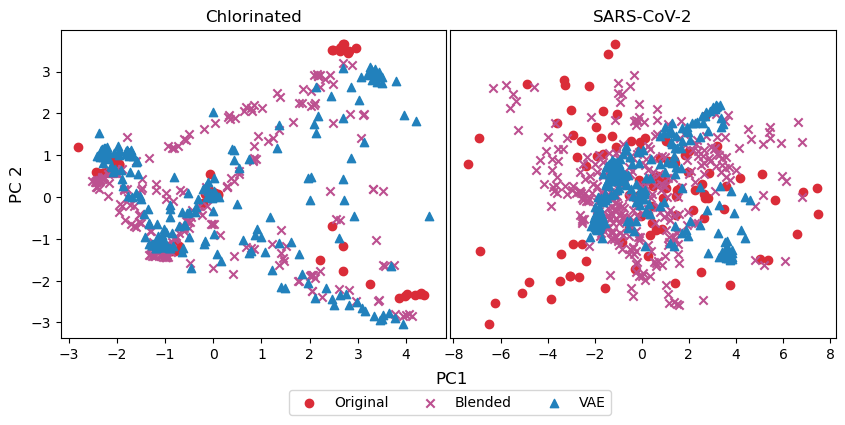

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.subplots_adjust(wspace=0.01, hspace=0)

fig.text(0.5, -0.005, "PC1", fontsize=12)

#ax1.set_xlabel("PC 1", fontsize=12)
ax1.set_ylabel("PC 2", fontsize=12)    
ax1.set_title("Chlorinated")

ax1.scatter(chlo_orig_pca_features[:, 0], chlo_orig_pca_features[:, 1], color="#DA2C38", marker="o", label="Original")
ax1.scatter(chlo_blend_pca_features[:, 0], chlo_blend_pca_features[:, 1], color="#bc5090", marker="x", label="Blended")
ax1.scatter(chlo_vae_pca_features[:, 0], chlo_vae_pca_features[:, 1], color="#2281BC", marker="^", label="VAE")

#ax2.set_xlabel("PC 1", fontsize=12)
ax2.set_title("SARS-CoV-2")
ax2.set_yticks([])

ax2.scatter(sars_orig_pca_features[:, 0], sars_orig_pca_features[:, 1], color="#DA2C38", marker="o", label="Original")
ax2.scatter(sars_blend_pca_features[:, 0], sars_blend_pca_features[:, 1], color="#bc5090", marker="x", label="Blended")
ax2.scatter(sars_vae_pca_features[:, 0], sars_vae_pca_features[:, 1], color="#2281BC", marker="^", label="VAE")

plt.legend(bbox_to_anchor=(0, -0.25), loc='lower center', ncol=3, borderaxespad=0)
plt.savefig("../figs/pca_plot.png", bbox_inches="tight")